## Procesamiento de Imágenes - Diplodatos 2023

Trabajo Práctico

Importante: Para obtener los créditos de materia completa, resolver al menos 1 ejercicio optativo de cada trabajo práctico.

In [2]:
# Arriba corregi el año de cursado, la notebook original estaba con el 2022 y seria 2023

In [3]:
integrantes = ["Sergio Garzón"]
print(*integrantes, sep="\n")

Sergio Garzón


Importar las librerías necesarias

In [4]:
!pip install imageio

In [7]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Para ver la version de numpy
np.__version__

'1.23.5'

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

Imageio: 'wikkie.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/wikkie.png (461 kB)
Downloading: 8192/472047 bytes (1.7%)472047/472047 bytes (100.0%)
  Done
File saved as /root/.imageio/images/wikkie.png.


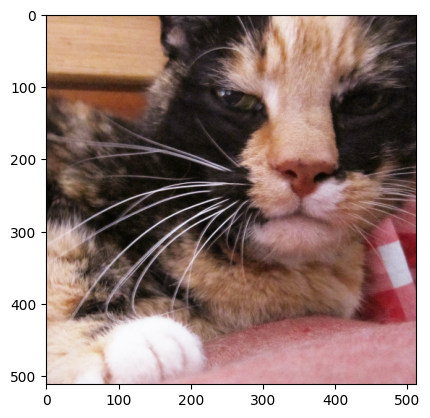

In [9]:
# Se lee la imagen con la libreria imageio

img_1 = iio.imread('imageio:wikkie.png')
plt.imshow(img_1)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

In [10]:
# Para ver el tipo de imagen
print(type(img_1))

<class 'numpy.ndarray'>


In [11]:
# Para ver como array la imagen
print(img_1)

[[[210 165 132]
  [212 169 135]
  [210 165 129]
  ...
  [ 25  21  19]
  [ 28  24  21]
  [ 31  26  23]]

 [[213 170 137]
  [203 158 123]
  [208 163 126]
  ...
  [ 23  19  19]
  [ 21  18  18]
  [ 30  25  25]]

 [[214 170 139]
  [210 164 132]
  [215 171 142]
  ...
  [ 33  27  27]
  [ 23  20  20]
  [ 32  26  26]]

 ...

 [[219 193 189]
  [220 195 191]
  [222 198 195]
  ...
  [199 137 145]
  [200 138 150]
  [202 140 150]]

 [[210 183 178]
  [219 195 189]
  [216 191 189]
  ...
  [201 140 146]
  [205 145 151]
  [203 142 149]]

 [[211 185 180]
  [214 189 184]
  [216 191 188]
  ...
  [204 142 157]
  [201 139 152]
  [200 137 150]]]


### Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

Imageio: 'immunohistochemistry.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/immunohistochemistry.png (459 kB)
Downloading: 8192/470201 bytes (1.7%)470201/470201 bytes (100.0%)
  Done
File saved as /root/.imageio/images/immunohistochemistry.png.


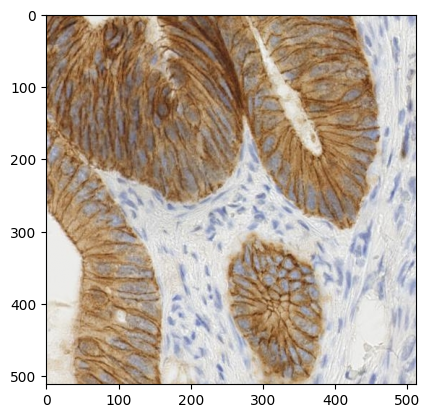

In [12]:
img_ = iio.imread('imageio:immunohistochemistry.png') / 255
plt.imshow(img_)

In [13]:
# Pruebo esto para ver los canales RGB

# Separar los canales R, G y B
# En este caso funciona y no da error porque la imagen que cargue tiene los colores de rojo, verde y azul
# No esta solicitado, pero me intereso ver como se hacia
red = img_[:, :, 0]
green = img_[:, :, 1]
blue = img_[:, :, 2]

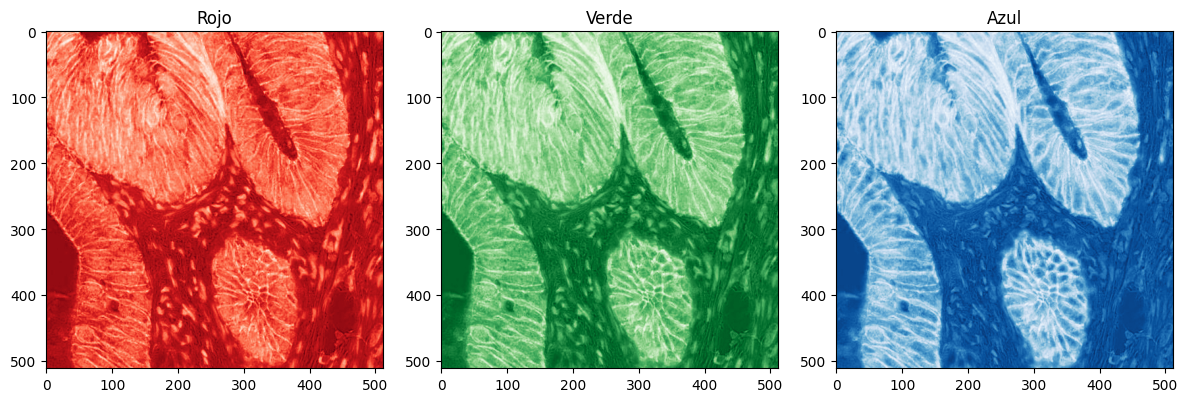

In [14]:
# Imprimir la imagen en canales
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(red, cmap='Reds')
plt.title('Rojo')

plt.subplot(132)
plt.imshow(green, cmap='Greens')
plt.title('Verde')

plt.subplot(133)
plt.imshow(blue, cmap='Blues')
plt.title('Azul')

plt.tight_layout()
plt.show()

In [15]:
print("Para pasar de RGB a YIQ, utilizo los valores de la matriz extraidos de Wikipedia")

Para pasar de RGB a YIQ, utilizo los valores de la matriz extraidos de Wikipedia


<img src="rgb-yiq.png" alt="Aqui va la imagen rbg-yiq.png">

**Fuente:** Wikipedia -> https://es.wikipedia.org/wiki/YIQ"

In [16]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

Text(0.5, 1.0, 'Imagen transformada de RGB a YIQ')

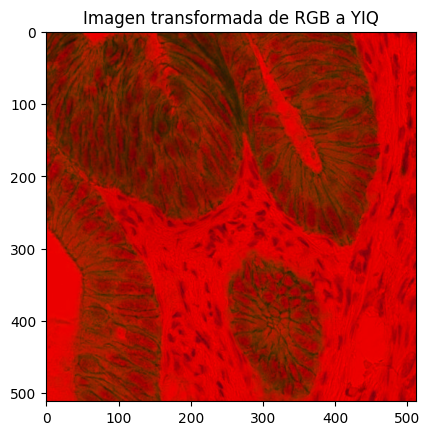

In [17]:
img_YIQ = apply_matrix(img_, MAT_RGB2YIQ)

plt.imshow(img_YIQ)
plt.title("Imagen transformada de RGB a YIQ")

In [18]:
print(img_YIQ[:,:,0])

[[0.49076078 0.51821176 0.48615686 ... 0.63416471 0.6935451  0.77338431]
 [0.43788235 0.44964706 0.43097647 ... 0.68122353 0.68570196 0.71803529]
 [0.38472549 0.41217647 0.4306549  ... 0.71400392 0.6753451  0.67400392]
 ...
 [0.85439608 0.87400392 0.90537647 ... 0.82683529 0.82687843 0.83864314]
 [0.83960392 0.85921176 0.89058431 ... 0.83557255 0.81511373 0.82805098]
 [0.85921176 0.85921176 0.8670549  ... 0.81988627 0.80844314 0.82805098]]


In [19]:
# Aumento Y que la iluminación

# Cómo dice el instructivo da los ejemplos para alfa en 1.2 (Menor luminosidad) y 1.5 (Mayor luminosidad)
alfa = 1.2

aux = img_YIQ[:, :, 0]

if np.all(img_YIQ[:, :, 0] <= 1):
    print("\n\nSe puede cambiar la luminosidad")

# Aqui verifico que no se vaya de rango para poder incrementar la luminosidad
if np.all(img_YIQ[:, :, 0] <= 1):
    img_YIQ[:,:,0] *= alfa

# Nuevo valor de la imagen con iluminación
print("\n Verificamos la matriz de luminosidad: \n", img_YIQ[:,:,0])

# Para verificar si algunos valores de luminosidad son mayores que 1
if np.any(img_YIQ[:, :, 0] > 1):
    print("\n\nLa luminosidad se ha cambiado pero algunos valores superan el rango de valor 1")



Se puede cambiar la luminosidad

 Verificamos la matriz de luminosidad: 
 [[0.58891294 0.62185412 0.58338824 ... 0.76099765 0.83225412 0.92806118]
 [0.52545882 0.53957647 0.51717176 ... 0.81746824 0.82284235 0.86164235]
 [0.46167059 0.49461176 0.51678588 ... 0.85680471 0.81041412 0.80880471]
 ...
 [1.02527529 1.04880471 1.08645176 ... 0.99220235 0.99225412 1.00637176]
 [1.00752471 1.03105412 1.06870118 ... 1.00268706 0.97813647 0.99366118]
 [1.03105412 1.03105412 1.04046588 ... 0.98386353 0.97013176 0.99366118]]


La luminosidad se ha cambiado pero algunos valores superan el rango de valor 1


In [20]:
# Para cambiar la saturación

# Coeficiente de saturación, si es menor a 1 baja la saturación, y viceversa

beta = 0.5

# Para cambiar I (valor 1) o Q (valor 2)
cambiarValor = 2

auxI = img_YIQ[:, :, 1]
auxQ = img_YIQ[:, :, 2]

if(cambiarValor == 1):
    if (np.all(img_YIQ[:, :, 1] >= -0.5957) or np.all(img_YIQ[:, :, 1] <= 0.5957)):
        print("Se puede editar la saturación")
        img_YIQ[:, :, 1] *= beta

        print("\n Verificamos la matriz de saturación I: \n", img_YIQ[:, :, 1])

        if (np.any(img_YIQ[:, :, 1] >= -0.5957) or np.any(img_YIQ[:, :, 1] <= 0.5957)):
            print("\n\nLa saturación I se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)")


if(cambiarValor == 2):
    if (np.all(img_YIQ[:, :, 2] >= -0.5226) or np.all(img_YIQ[:, :, 2] <= 0.5226)):
        print("Se puede editar la saturación")
        img_YIQ[:, :, 2] *= beta

        print("\n Verificamos la matriz de saturación I: \n", img_YIQ[:, :, 2])

        if (np.any(img_YIQ[:, :, 2] >= -0.5226) or np.any(img_YIQ[:, :, 2] <= 0.5226)):
            print("\n\nLa saturación Q se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)")


Se puede editar la saturación

 Verificamos la matriz de saturación I: 
 [[-0.00707255 -0.00708627 -0.00502157 ...  0.01832941  0.01668824
   0.01440392]
 [-0.00726471 -0.00727059 -0.00418824 ...  0.01830588  0.01669216
   0.01382157]
 [-0.00665098 -0.00666471 -0.00523529 ...  0.0160451   0.01445294
   0.01262353]
 ...
 [-0.00467451 -0.00468431 -0.0047     ... -0.00243922 -0.00058627
  -0.00059216]
 [-0.00344706 -0.00345686 -0.00347255 ... -0.00122353 -0.00058039
  -0.00017255]
 [-0.00345686 -0.00345686 -0.00346078 ... -0.00121569 -0.00016275
  -0.00017255]]


La saturación Q se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)


In [21]:
# Para ver los rangos de la matriz
print("Tamaño maximo: ", img_YIQ.min())
print("Tamaño minimo", img_YIQ.max())

Tamaño maximo:  -0.08703137254901962
Tamaño minimo 1.1999999999999997


In [22]:
# Si hay valores que se van de rango, con esto lo seteamos
img_YIQ = np.clip(img_YIQ, 0, 1)

In [23]:
# Para volver ver los rangos de la matriz
print("Tamaño maximo: ", img_YIQ.min())
print("Tamaño minimo", img_YIQ.max())

Tamaño maximo:  0.0
Tamaño minimo 1.0


Text(0.5, 1.0, 'Imagen transformada de RGB a YIQ')

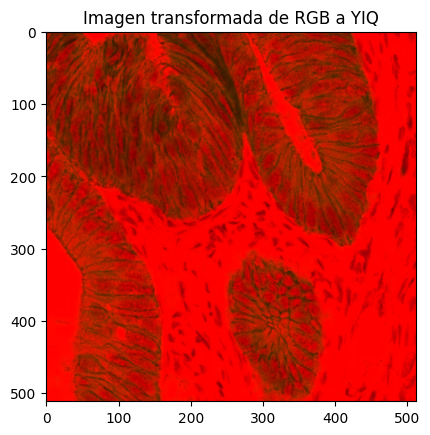

In [24]:
plt.imshow(img_YIQ)
plt.title("Imagen transformada de RGB a YIQ")

In [25]:
print("Para hacer la inversa, es decir pasar de YIQ a RGB, utilizo los valores de la matriz extraidos de Wikipedia")

Para hacer la inversa, es decir pasar de YIQ a RGB, utilizo los valores de la matriz extraidos de Wikipedia


<img src="yiq-rgb.png" alt="Aqui va la imagen yiq-rgb.png">

In [26]:
MAT_YIQ2RGB = np.array([[1, 0.9563, 0.6210],
                        [1, -0.2721, -0.6474],
                        [1, -1.1070, 1.7046]])

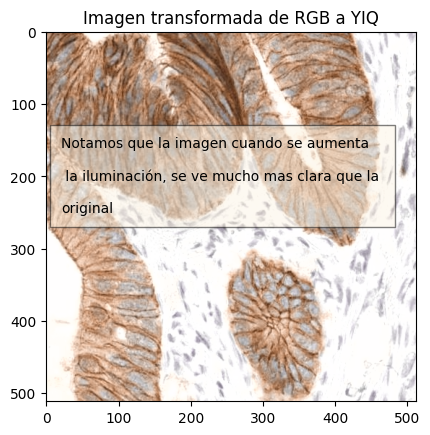

In [27]:
img_new_RGB = apply_matrix(img_YIQ, MAT_YIQ2RGB) # Despues vi en la clase 4 que se puede aplicar la inversa directamente con una función de la libreria Numpy, en vez de haber escrito la matriz de arriba, pero ya lo hice de esta forma

plt.imshow(img_new_RGB)
plt.title("Imagen transformada de RGB a YIQ")

plt.text(20, 250, 'Notamos que la imagen cuando se aumenta \n\n la iluminación, se ve mucho mas clara que la \n\noriginal', bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 8})
plt.show()


### Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos. Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [28]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [30]:
img_rgb = iio.imread('imageio:bricks.jpg') / 255

Imageio: 'bricks.jpg' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/bricks.jpg (106 kB)
Downloading: 8192/108257 bytes (7.6%)108257/108257 bytes (100.0%)
  Done
File saved as /root/.imageio/images/bricks.jpg.


[0.69019608 0.6745098  0.63921569]
(512, 512, 3)
float64


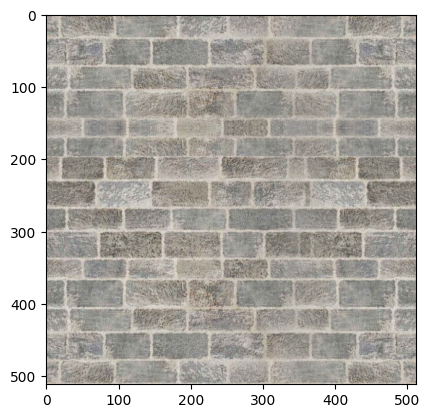

In [31]:
plt.imshow(img_rgb)

# Accedemos a un pixel para ver el valor
print(img_rgb[100, 100])

print(img_rgb.shape)
print(img_rgb.dtype)

In [32]:
print("Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


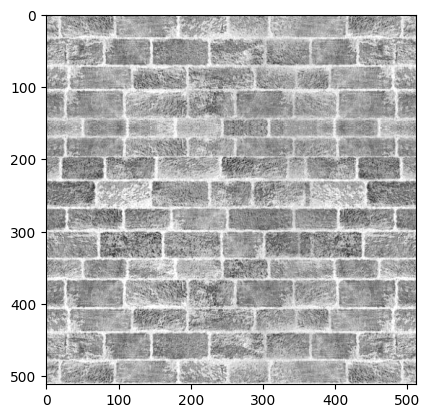

In [33]:
new_image_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)

canal_Y = new_image_YIQ[:,:,0]

canal_Y_2 = np.clip(canal_Y * 1.2, 0 , 1)
plt.imshow(canal_Y_2, 'gray', )

In [34]:
canal_Y.flatten().shape

(262144,)

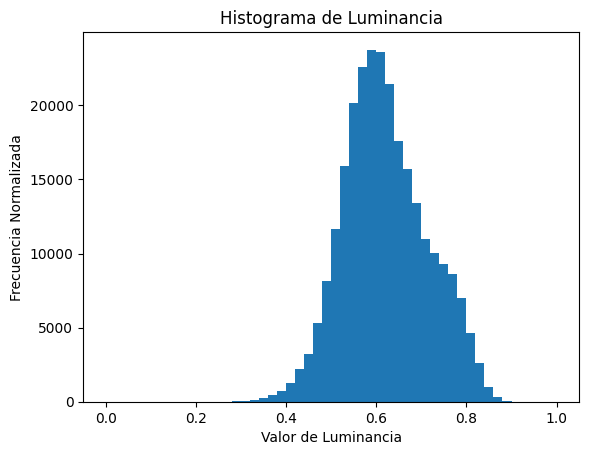

In [35]:
histogram = plt.hist(canal_Y.flatten(), bins=50, range=(0,1))

plt.title('Histograma de Luminancia')
plt.xlabel('Valor de Luminancia')
plt.ylabel('Frecuencia Normalizada')

plt.show()

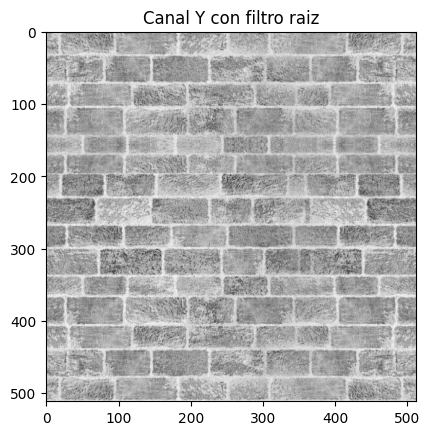

In [36]:
''' Para elegir el filtro:
    - Raiz (valor_elegido = 1)
    - Cuadrado (valor_elegido = 2)
    - Linel a trozos (valor_elegido = 3) '''

valor_elegido = 1

if (valor_elegido == 1):
    # plt.imshow(canal_Y, 'gray')
    canal_Y_raiz = np.sqrt(canal_Y)
    plt.title('Canal Y con filtro raiz')
    plt.imshow(canal_Y_raiz, 'gray')

if (valor_elegido == 2):
    canal_Y_cuadrado = (canal_Y * canal_Y)
    plt.title('Canal Y con filtro cuadrado')
    plt.imshow(canal_Y_cuadrado, 'gray')

# El filtro lineal a trozos no lo he visto en los videos ni en las notebook,
# tal vez este pero no lo encontre,
# pero investigando en internet, pude encontrar esto
if (valor_elegido == 3):
    x_points = [0, 0.3, 0.7, 1.0]
    y_points = [0, 0.2, 0.8, 1.0]

    canal_Y_filtro_lineal_trozos = np.interp(canal_Y, x_points, y_points)
    plt.title('Canal Y con filtro lineal a trozos')
    plt.imshow(canal_Y_filtro_lineal_trozos, 'gray')

Text(0.5, 1.0, 'Histograma del Canal Y con filtro raiz')

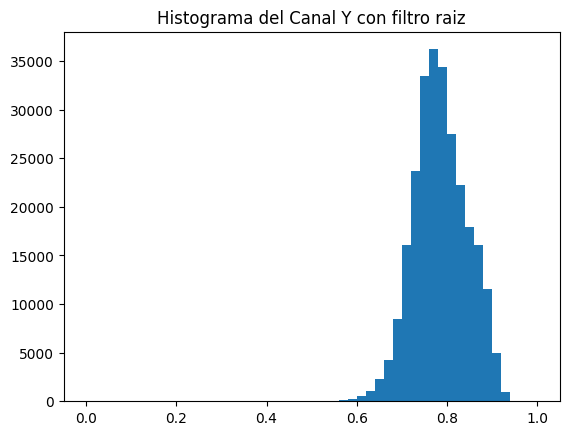

In [37]:
cadena_caracteres = ""

if (valor_elegido == 1):
    auxiliar = canal_Y_raiz
    cadena_caracteres = 'Histograma del Canal Y con filtro raiz'

if (valor_elegido == 2):
    auxiliar = canal_Y_cuadrado
    cadena_caracteres = 'Histograma del Canal Y con filtro cuadrado'

if (valor_elegido == 3):
    auxiliar = canal_Y_filtro_lineal_trozos
    cadena_caracteres = 'Histograma del Canal Y con filtro lineal a trozos'

plt.hist(auxiliar.flatten(), bins=50, range=(0,1))
plt.title(cadena_caracteres)

### Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

In [38]:
img_rgb_new_2_1 = iio.imread('imageio:chelsea.png') / 255

Imageio: 'chelsea.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/chelsea.png (216 kB)
Downloading: 8192/221294 bytes (3.7%)221294/221294 bytes (100.0%)
  Done
File saved as /root/.imageio/images/chelsea.png.


In [39]:
print("Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


In [40]:
img_YIQ_new_2_1 = apply_matrix(img_rgb_new_2_1, MAT_RGB2YIQ)

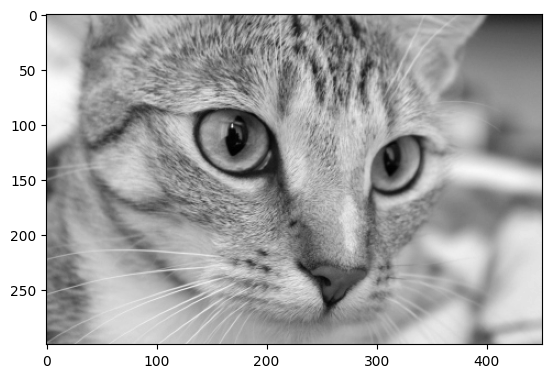

In [41]:
# Canal Y es de Iluminación
canal_Y_2_1 = img_YIQ_new_2_1[:,:,0]
canal_I_2_1 = img_YIQ_new_2_1[:,:,1]
canal_Q_2_1 = img_YIQ_new_2_1[:,:,2]

plt.imshow(canal_Y_2_1, 'gray')

In [42]:
def convolucionCierre(imagen, kernel):
    filas, columnas = imagen.shape
    output0 = np.empty(imagen.shape)
    for i in range(filas):
        for j in range(columnas):
            entorno = imagen[max(0, i-1):min(filas, i+2), max(0, j-1):min(columnas, j+2)]
            if len(entorno) < 3 or len(entorno[0]) < 3:  # Si el entorno tiene menos de 3 filas o 3 columnas
                entorno = np.pad(entorno, ((max(0, 1-i), max(0, i+2-filas)), (max(0, 1-j), max(0, j+2-columnas))), 'edge')
            producto = entorno * kernel[:entorno.shape[0], :entorno.shape[1]]
            suma = np.sum(producto)
            output0[i, j] = suma
    return output0

In [43]:
# Función auxiliar para ejecutar los filtros 10 veces

def execution_filters(canal_luminance_Y, kernel_param):
    foto=canal_luminance_Y
    for i in range(10):
        foto=convolucionCierre(foto,kernel_param)
    return foto

In [44]:
print("Filtro pasabajos plano (El ejercicio de clases)")

Filtro pasabajos plano (El ejercicio de clases)


Text(0.5, 1.0, 'Imagen resultado del filtro pasabajos plano')

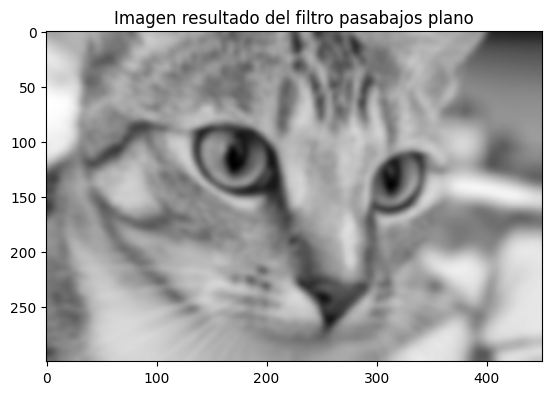

In [45]:
foto = execution_filters(canal_Y_2_1, np.ones((3,3))/9.)

plt.imshow(foto,"gray")
plt.title("Imagen resultado del filtro pasabajos plano")

In [46]:
print("Filtro pasabajo Bartlett")

Filtro pasabajo Bartlett


Text(0.5, 1.0, 'Imagen resultado del filtro pasabajos Bartlett')

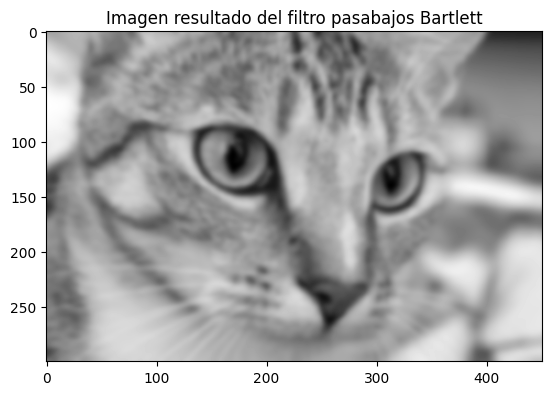

In [47]:
kernel_bartlett = np.array([
    [1,  2, 1],
    [2,  4, 2],
    [1,  2, 1]
])

suma_kernel_bartlett = np.sum(kernel_bartlett)

kernel = kernel_bartlett / suma_kernel_bartlett

foto_barlett=execution_filters(canal_Y_2_1, kernel)

plt.imshow(foto_barlett,"gray")
plt.title("Imagen resultado del filtro pasabajos Bartlett")

In [48]:
print("Filtro pasabajos Gaussiano 5x5")

Filtro pasabajos Gaussiano 5x5


Text(0.5, 1.0, 'Imagen resultado del filtro pasabajos Gaussiano')

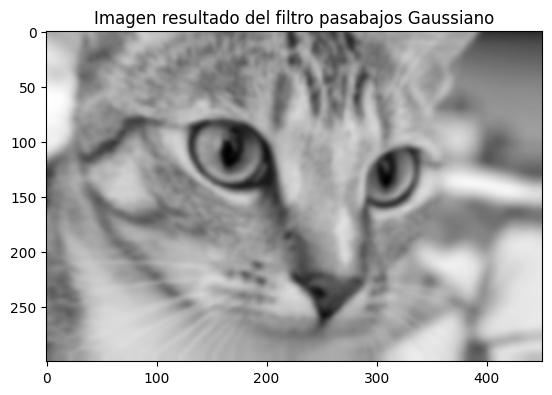

In [49]:
kernel_gaussiano = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])

suma_kernel_gaussiano = np.sum(kernel_gaussiano)

kernelG = kernel_gaussiano / suma_kernel_gaussiano

foto_nueva_gaussiano = execution_filters(canal_Y_2_1, kernelG)

plt.imshow(foto_nueva_gaussiano,"gray")
plt.title("Imagen resultado del filtro pasabajos Gaussiano")

In [50]:
print("Filtro detector de bordes Lapaciano v4")

Filtro detector de bordes Lapaciano v4


Text(0.5, 1.0, 'Imagen resultado del filtro detector de bordes Laplaciano v4')

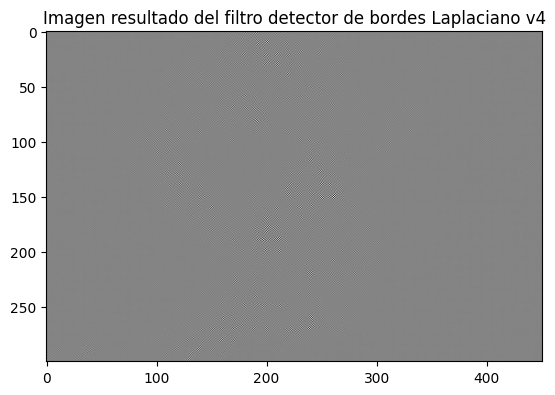

In [51]:
# Este filtro no me esta funcionando, no se porque
kernel_laplaciano_v4 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

foto_laplaciano = execution_filters(canal_Y_2_1, kernel_laplaciano_v4)

plt.imshow(foto_laplaciano,"gray")
plt.title("Imagen resultado del filtro detector de bordes Laplaciano v4")

In [52]:
print("Otro filtro detector de bordes Laplaciano otra version")

Otro filtro detector de bordes Laplaciano otra version


Text(0.5, 1.0, 'Imagen resultado del filtro detector de bordes Laplaciano')

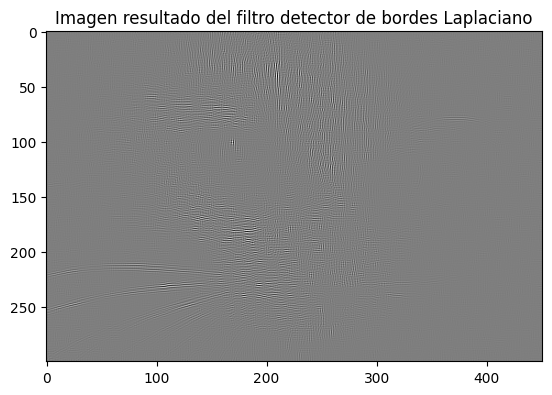

In [53]:
# Este filtro no me esta funcionando, no se porque
kernel_laplaciano = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

foto_lap = execution_filters(canal_Y_2_1, kernel_laplaciano)

plt.imshow(foto_lap,"gray")
plt.title("Imagen resultado del filtro detector de bordes Laplaciano")

In [54]:
print("Ahora probamos los filtros direccionales Gx y Gy (Sobel 4 orientaciones)")

Ahora probamos los filtros direccionales Gx y Gy (Sobel 4 orientaciones)


Text(0.5, 1.0, 'Imagen resultado del filtro direccional Gx')

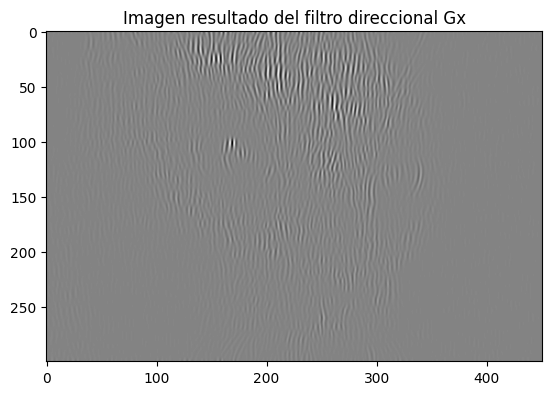

In [55]:
kernel_direccional_Gx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

foto_gx = execution_filters(canal_Y_2_1, kernel_direccional_Gx)

plt.imshow(foto_gx,"gray")
plt.title("Imagen resultado del filtro direccional Gx")

Text(0.5, 1.0, 'Imagen resultado del filtro direccional Gy')

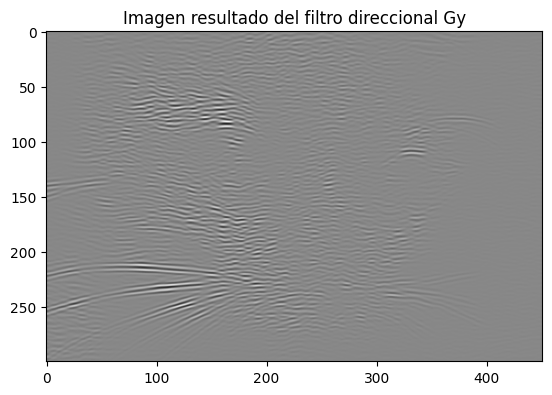

In [56]:
kernel_direccional_Gy = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

foto_gy = execution_filters(canal_Y_2_1, kernel_direccional_Gy)

plt.imshow(foto_gy,"gray")
plt.title("Imagen resultado del filtro direccional Gy")

In [57]:
print("Filtro pasabanda")

Filtro pasabanda


Text(0.5, 1.0, 'Imagen resultado del filtro pasabanda')

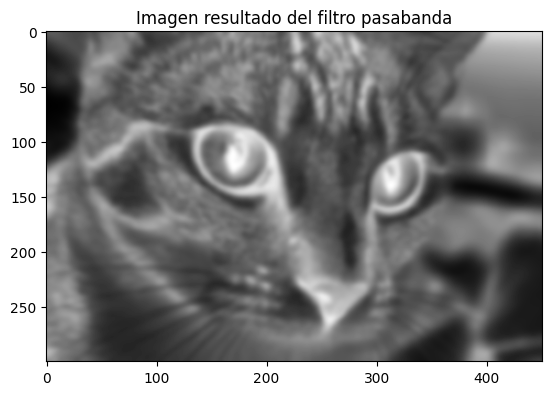

In [58]:
# Basicamente, para hacer esto debo resta el filtro de Bartlett y el Gaussiano

foto_pasabanda = foto_nueva_gaussiano - foto_barlett

plt.imshow(foto_pasabanda, "gray")
plt.title("Imagen resultado del filtro pasabanda")


### Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [59]:
img_rgb = iio.imread('imageio:coffee.png') / 255

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


In [60]:
print("Para hacer la función de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


In [61]:
img_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)

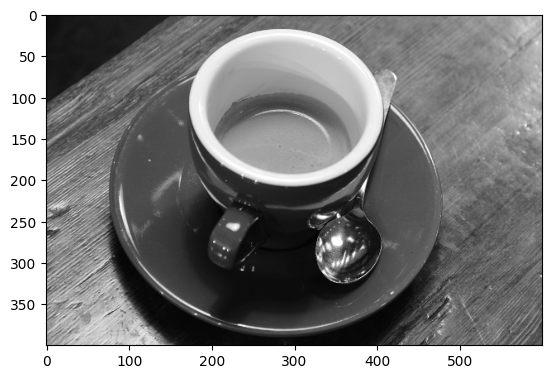

In [62]:
# Canal Y es de Iluminación
canal_Y = img_YIQ[:,:,0]

plt.imshow(canal_Y, 'gray')

In [63]:
# Metodo para hacer la erosion
def erosion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2]
            minimo = np.min(entorno.flatten())
            output[i,j]=minimo
    output=output[1:filas-1,1:columnas-1]
    return(output)

In [64]:
# Metodo para hacer la dilatación
def dilatacion(imagen):
    filas,columnas=imagen.shape
    output2=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2]
            maximo = np.max(entorno.flatten())
            output2[i,j]=maximo
    output2=output2[1:filas-1,1:columnas-1]
    return(output2)

In [65]:
# Funciones auxiliar

    # No logro comprender como redimensionar la imagen con la forma explicada en la Notebook 9 -> img_2 = img_2[0:300, 100:551, :]

def restar(valor_param_1, valor_param_2):
    # De todos modos utilice esto que encontre para redimensionar
    alto, ancho = valor_param_2.shape
    valor_no_param_1 = np.resize(valor_param_1, (alto, ancho))
    return valor_no_param_1 - valor_param_2

def aplicar(fx, valor_p_1, valor_p_2):
    return fx(valor_p_1, valor_p_2)

def realizar_varias_veces(img_canal_Y, option):
    foto=img_canal_Y

    for i in range(5):
        if(option==1):
            foto=erosion(foto)
        if (option == 2):
            foto=dilatacion(foto)
    return foto

In [66]:
print("Pasos para realizar la apertura morfologica")

Pasos para realizar la apertura morfologica


Text(0.5, 1.0, 'Imagen Erosionada')

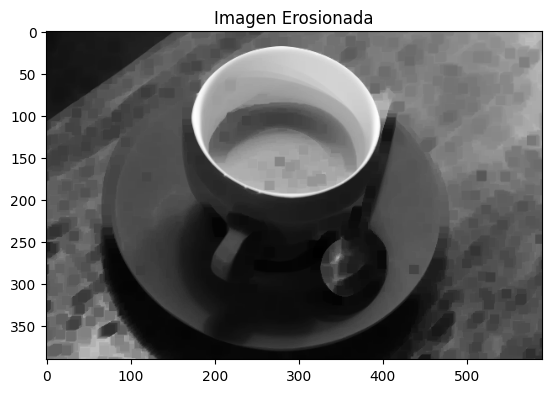

In [67]:
# Primero erosino la imagen y la muestro
imagen_erosionada = realizar_varias_veces(canal_Y, 1)

plt.imshow(imagen_erosionada,"gray")
plt.title("Imagen Erosionada")

In [68]:
print("Ahora hago la dilatación de la imagen, y con esto tengo lista toda la apertura morfologica")

Ahora hago la dilatación de la imagen, y con esto tengo lista toda la apertura morfologica


Text(0.5, 1.0, 'Imagen dilatada')

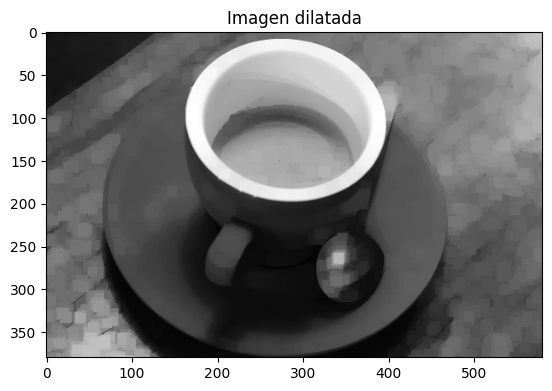

In [69]:
# Dilato la imagen y la muestro
imagen_dilatada = realizar_varias_veces(imagen_erosionada, 2)

plt.imshow(imagen_dilatada,"gray")
plt.title("Imagen dilatada")

In [70]:
print("Ahora hago el cierre morfologico")

Ahora hago el cierre morfologico


Text(0.5, 1.0, 'Imagen con cierre morfologico')

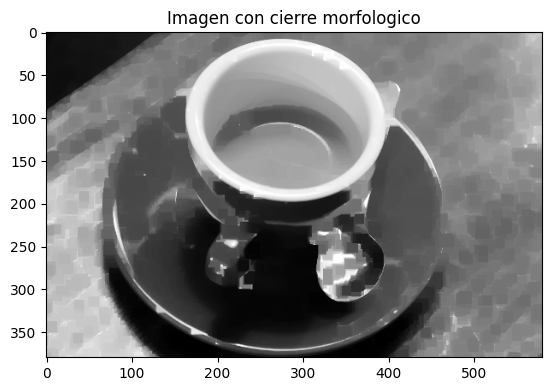

In [71]:
imagen_dilatada = realizar_varias_veces(canal_Y, 2)

imagen_cierre = realizar_varias_veces(imagen_dilatada, 1)

plt.imshow(imagen_cierre, "gray")
plt.title("Imagen con cierre morfologico")

In [72]:
print("Ahora calculo el borde morfologico")

Ahora calculo el borde morfologico


Text(0.5, 1.0, 'Borde Morfológico')

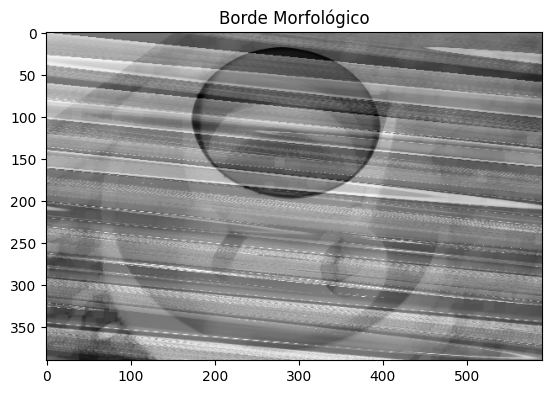

In [73]:
borde_morfologico = aplicar(restar, canal_Y, imagen_erosionada)

plt.imshow(borde_morfologico, cmap='gray')
plt.title('Borde Morfológico')

In [74]:
print("Calculo del Top-hat")

Calculo del Top-hat


Text(0.5, 1.0, 'Top-Hat')

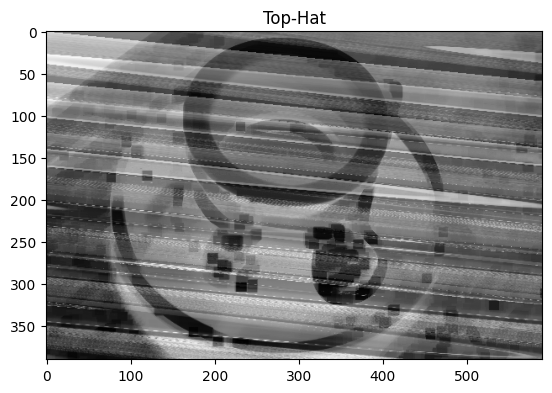

In [75]:
# Calcular el Top-Hat

top_hat = aplicar(restar, canal_Y, imagen_dilatada)

# Muestra la imagen del Top-Hat
plt.imshow(top_hat, cmap='gray')
plt.title('Top-Hat')

In [76]:
print("Calculo de la mediana")

Calculo de la mediana


In [77]:
mediana_imagen = np.median(canal_Y)

In [78]:
print("Valor de la mediana: ", mediana_imagen)

Valor de la mediana:  0.40202352941176467



### Ejercicios Optativos. Ver presentación para más detalle

Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.


#### Ejercicio 1.4 (optativo)

Implementar un aplicativo que ejecute las operaciones vistas en este tema.

Se muestra la interfaz gráfica de un ejemplo en particular.

<img src="Optativo1-4.png" width="750px" height="400px" alt="Aqui va la imagen Optativo1-4.png">

#### Resolución de la actividad

In [79]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [80]:
# Abrimos las 2 imagenes
imagen1 = iio.imread('imageio:moon.png') / 255
imagen2 = iio.imread('imageio:camera.png') / 255

Imageio: 'moon.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/moon.png (44 kB)
Downloading: 8192/45494 bytes (18.0%)45494/45494 bytes (100.0%)
  Done
File saved as /root/.imageio/images/moon.png.
Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.9%)139512/139512 bytes (100.0%)
  Done
File saved as /root/.imageio/images/camera.png.


In [81]:
# Visualizamos las dimensiones de ambas imagenes
print("La dimensión de la primer imagen es: ", imagen1.shape)
print("La dimensión de la segunda imagen es: ", imagen2.shape)

La dimensión de la primer imagen es:  (512, 512)
La dimensión de la segunda imagen es:  (512, 512)


In [82]:
print("Siendo que las imagenes elegidas son del mismo tamaño, no hace falta redimensionar, por ende se suman sin inconvenientes")

Siendo que las imagenes elegidas son del mismo tamaño, no hace falta redimensionar, por ende se suman sin inconvenientes


In [83]:
# Sumo sin aplicar el redimensionamiento, por ejemplo: imagen2 = imagen2[0:255, 100:500, :]
imagen3 = imagen1 + imagen2

In [84]:
print("Datos de las suma de las imagenes")
print(imagen3.dtype)
print(imagen3.min())
print(imagen3.max())

Datos de las suma de las imagenes
float64
0.07058823529411765
1.8196078431372549


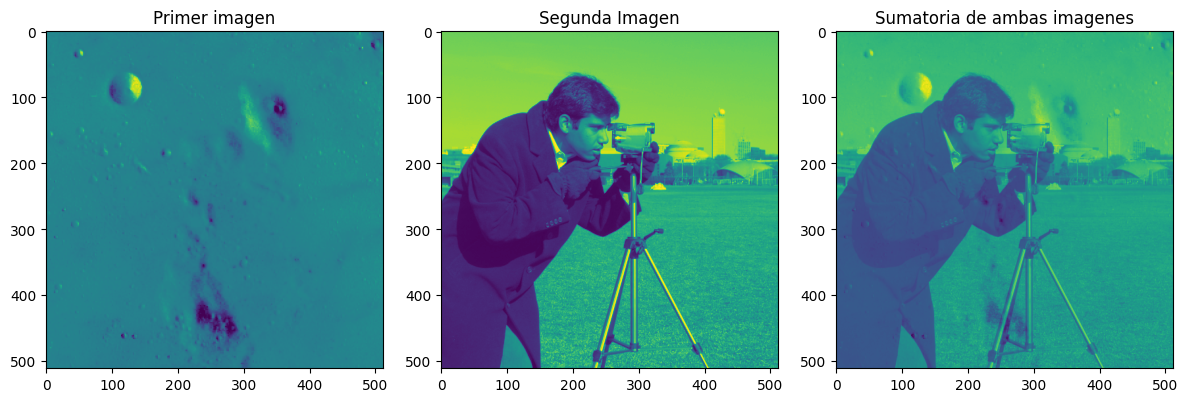

In [85]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(imagen1)
plt.title('Primer imagen')

plt.subplot(132)
plt.imshow(imagen2)
plt.title('Segunda Imagen')

plt.subplot(133)
plt.imshow(imagen3)
plt.title('Sumatoria de ambas imagenes')

plt.tight_layout()
plt.show()

#### Ejercicio 2.3 (optativo)

Desarrollar un aplicativo o notebook que implemente las siguientes funciones:

* Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
* Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
* Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.

#### Resolución de la actividad

In [86]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [87]:
image_new_excercise_optative_2_3 = iio.imread('imageio:wood.jpg')

Imageio: 'wood.jpg' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/wood.jpg (97 kB)
Downloading: 8192/98922 bytes (8.3%)98922/98922 bytes (100.0%)
  Done
File saved as /root/.imageio/images/wood.jpg.


In [88]:
def convolucion2(imagen,kernel):
    filas,columnas=imagen.shape
    output0 = np.empty(imagen.shape)
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[(i-1):(i+2),(j-1):(j+2)]
            #print(entorno.shape)
            #print(kernel.shape)
            producto = entorno * kernel
            suma = np.sum(producto)
            output0[i,j]=suma
    output0=output0[1:filas-1,1:columnas-1]
    return(output0)

In [89]:
# Función auxiliar para ejecutar los filtros 10 veces

def execution_filters2(canal_luminance_Y, kernel_param):
    foto=canal_luminance_Y
    for i in range(10):
        foto=convolucion(foto,kernel_param)
    return foto

In [92]:
print("Para hacer la función de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


In [93]:
img_YIQ_image_new_excercise_optative = apply_matrix(image_new_excercise_optative_2_3, MAT_RGB2YIQ)

In [94]:
# Canal Y es de Iluminación
canal_Y_image_new_excercise_optative = img_YIQ_image_new_excercise_optative[:,:,0]

In [95]:
kernel_constante = np.array([
    [1,  1, 1],
    [1,  1, 1],
    [1,  1, 1]
])

suma_kernel_constante = np.sum(kernel_constante)

kernelc = kernel_constante / suma_kernel_constante

foto_constante=execution_filters(canal_Y_image_new_excercise_optative, kernelc)

In [96]:
kernel_bilineal = np.array([
   [0.25, 0.5, 0.25],
   [0.5, 1, 0.5],
   [0.25, 0.5, 0.25]
])

suma_kernel_bilineal = np.sum(kernel_bilineal)

kernelb = kernel_bilineal / suma_kernel_bilineal

foto_bilineal=execution_filters(canal_Y_image_new_excercise_optative, kernelb)

In [97]:
kernel_cubico = np.array([
    [-0.5, 1, -0.5],
    [1, 0, 1],
    [-0.5, 1, -0.5]
])

suma_kernel_cubico = np.sum(kernel_cubico)

kernelcc = kernel_cubico / suma_kernel_cubico

foto_cubico=execution_filters(canal_Y_image_new_excercise_optative, kernelcc)

Text(0.5, 1.0, 'Imagen Original')

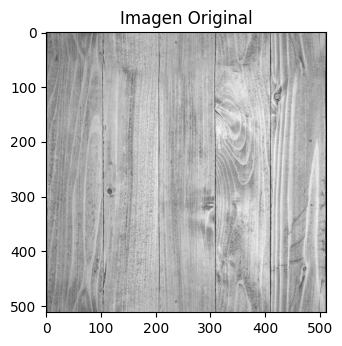

In [98]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1),
plt.imshow(canal_Y_image_new_excercise_optative, cmap='gray'),
plt.title('Imagen Original')

In [99]:
print("Resolución de Downsampling x2")

Resolución de Downsampling x2


In [100]:
# Recortar la imagen resultante a la mitad del tamaño original
filas, columnas = canal_Y_image_new_excercise_optative.shape
foto_constante_recortada = foto_constante[:filas // 2, :columnas // 2]
foto_bilineal_recortada = foto_bilineal[:filas // 2, :columnas // 2]
foto_cubico_recortada = foto_cubico[:filas // 2, :columnas // 2]

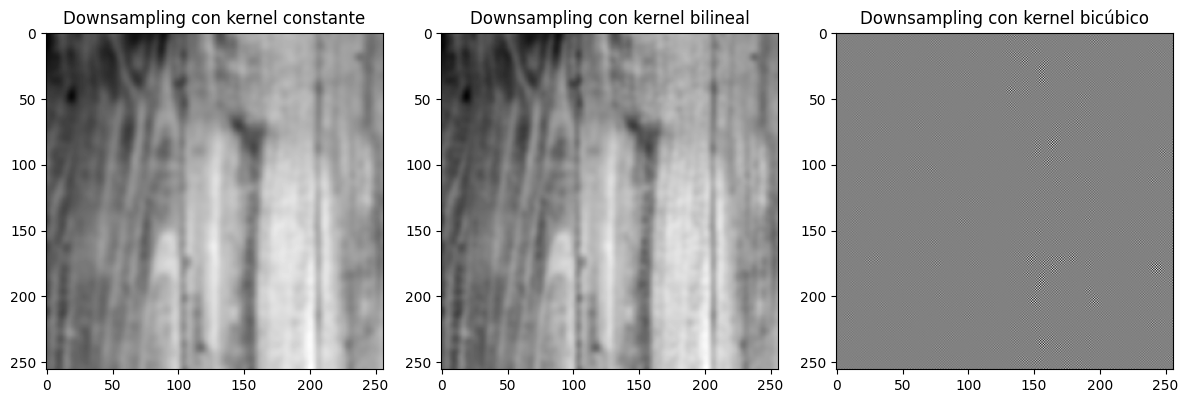

In [101]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(foto_constante_recortada, 'gray')
plt.title('Downsampling con kernel constante')

plt.subplot(132)
plt.imshow(foto_bilineal_recortada, 'gray')
plt.title('Downsampling con kernel bilineal')

plt.subplot(133)
plt.imshow(foto_cubico_recortada, 'gray')
plt.title('Downsampling con kernel bicúbico')

plt.tight_layout()
plt.show()

In [102]:
print("Resolución de Upsampling x2")

Resolución de Upsampling x2


In [103]:
from scipy import ndimage

# Upsampling con interpolación bilineal
foto_constante_upsampled = ndimage.zoom(foto_constante, 2, order=1)
foto_bilineal_upsampled = ndimage.zoom(foto_bilineal, 2, order=1)
foto_cubico_upsampled = ndimage.zoom(foto_cubico, 2, order=1)

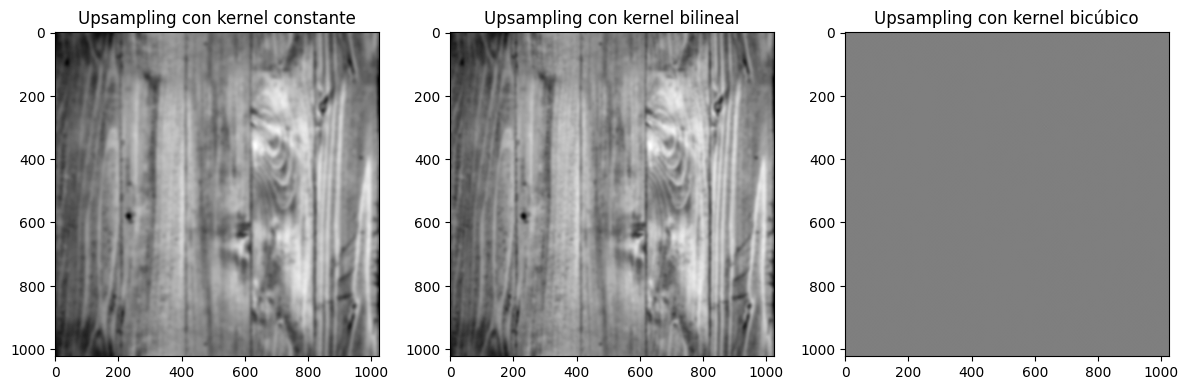

In [104]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(foto_constante_upsampled, 'gray')
plt.title('Upsampling con kernel constante')

plt.subplot(132)
plt.imshow(foto_bilineal_upsampled, 'gray')
plt.title('Upsampling con kernel bilineal')

plt.subplot(133)
plt.imshow(foto_cubico_upsampled, 'gray')
plt.title('Upsampling con kernel bicúbico')

plt.tight_layout()
plt.show()

In [105]:
print("Cuantización en niveles de gris uniforme")

Cuantización en niveles de gris uniforme


In [106]:
nivel_gris = 80
intervalo = 250
imagen_cuantizada_uniforme = (canal_Y_image_new_excercise_optative // (intervalo // nivel_gris)) * intervalo

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(132)
plt.imshow(canal_Y_image_new_excercise_optative, 'gray')
plt.title('Imagen original')

plt.subplot(133)
plt.imshow(imagen_cuantizada_uniforme, 'gray')
plt.title('Cuantización uniforme')

plt.tight_layout()
plt.show()

In [ ]:
print("Lo ultimo, no se como se hace: Dithering aleatorio, y difusión del error por scan-line.")

Lo ultimo, no se como se hace: Dithering aleatorio, y difusión del error por scan-line.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abbf0b20-ab07-4134-ab74-0cee9e2ed30a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>